In [ ]:
# !pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import os

DATA_FOLDER = "data"

In [2]:
filename = os.path.join(DATA_FOLDER, "auto_price.csv")
df=pd.read_csv(filename) 
df.drop_duplicates(inplace = True)
df = df[df["price"]< 600000].copy()

In [3]:
df.columns

Index(['price', 'MatriculationMonth', 'MatriculationYear', 'km', 'cv',
       'FuelType', 'gearboxType', 'Consume', 'city', 'province', 'Brand',
       'Model', 'Preparation', 'Engine', 'Seats', 'ConsumeFuel',
       'ConsumeFuelNotUrban', 'Emissions', 'Color', 'Metallizzato', 'Airbag',
       'NumberDoors', 'EmissionClass', 'AirConditioning', 'Interior'],
      dtype='object')

In [4]:
df.head()

,price,MatriculationMonth,MatriculationYear,km,cv,FuelType,gearboxType,Consume,city,province,...,ConsumeFuel,ConsumeFuelNotUrban,Emissions,Color,Metallizzato,Airbag,NumberDoors,EmissionClass,AirConditioning,Interior
0,15500,Luglio,2013,82914.0,85.0,Diesel,Cambio automatico,4.1,Modena,Modena,...,4.1,3.6,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3900,Novembre,2006,161038.0,75.0,Benzina,Cambio manuale,7.2,Modena,Modena,...,7.2,5.6,176.0,Blu,NaN,NaN,NaN,NaN,NaN,NaN
2,15900,Giugno,2014,114830.0,80.0,Diesel,Cambio manuale,3.8,Modena,Modena,...,3.8,3.3,98.0,Grigio,NaN,NaN,NaN,NaN,NaN,NaN
3,54900,Maggio,2016,61700.0,183.0,Diesel,Cambio automatico,5.9,Padova,Padova,...,5.9,5.5,156.0,Nero,NaN,NaN,NaN,NaN,NaN,NaN
4,45900,Settembre,2014,25790.0,190.0,Diesel,Cambio automatico,6.2,Padova,Padova,...,6.2,5.7,162.0,Grigio,Sì,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(131828, 25)

In [6]:
col_to_keep = ["MatriculationYear", "km", "cv", "FuelType", "gearboxType", "Engine", "Brand", "price"]
df = df[col_to_keep].copy()

In [7]:
df.head()

,MatriculationYear,km,cv,FuelType,gearboxType,Engine,Brand,price
0,2013,82914.0,85.0,Diesel,Cambio automatico,1995.0,BMW,15500
1,2006,161038.0,75.0,Benzina,Cambio manuale,1595.0,VOLKSWAGEN,3900
2,2014,114830.0,80.0,Diesel,Cambio manuale,1461.0,MERCEDES BENZ,15900
3,2016,61700.0,183.0,Diesel,Cambio automatico,2993.0,BMW,54900
4,2014,25790.0,190.0,Diesel,Cambio automatico,2993.0,BMW,45900


In [8]:
from datetime import datetime
currentYear = datetime.now().year
df["year"]=df["MatriculationYear"].apply(lambda x: currentYear-int(x))

In [9]:
df.drop(["MatriculationYear"], axis=1, inplace=True)

In [10]:
df.head()

,km,cv,FuelType,gearboxType,Engine,Brand,price,year
0,82914.0,85.0,Diesel,Cambio automatico,1995.0,BMW,15500,10
1,161038.0,75.0,Benzina,Cambio manuale,1595.0,VOLKSWAGEN,3900,17
2,114830.0,80.0,Diesel,Cambio manuale,1461.0,MERCEDES BENZ,15900,9
3,61700.0,183.0,Diesel,Cambio automatico,2993.0,BMW,54900,7
4,25790.0,190.0,Diesel,Cambio automatico,2993.0,BMW,45900,9


In [11]:
df.isna().sum()

km             21354
cv              8146
FuelType         656
gearboxType      761
Engine          5912
Brand            143
price              0
year               0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
conteggio=df["Brand"].value_counts().reset_index()
lista=conteggio[conteggio["Brand"]>500]["index"].values

In [14]:
lista

array(['FIAT', 'BMW', 'MERCEDES BENZ', 'AUDI', 'VOLKSWAGEN', 'FORD',
       'MINI', 'RENAULT', 'NISSAN', 'OPEL', 'PEUGEOT', 'CITROEN',
       'ALFA ROMEO', 'TOYOTA', 'LANCIA', 'SMART', 'LAND ROVER', 'JEEP',
       'VOLVO', 'KIA', 'PORSCHE', 'HYUNDAI', 'SKODA', 'SEAT', 'SUZUKI',
       'JAGUAR', 'DACIA', 'CHEVROLET'], dtype=object)

In [15]:
df["Brand"]=df["Brand"].apply(lambda x:  x if x in lista else "Other")

In [16]:
df.head()

,km,cv,FuelType,gearboxType,Engine,Brand,price,year
0,82914.0,85.0,Diesel,Cambio automatico,1995.0,BMW,15500,10
1,161038.0,75.0,Benzina,Cambio manuale,1595.0,VOLKSWAGEN,3900,17
2,114830.0,80.0,Diesel,Cambio manuale,1461.0,MERCEDES BENZ,15900,9
3,61700.0,183.0,Diesel,Cambio automatico,2993.0,BMW,54900,7
4,25790.0,190.0,Diesel,Cambio automatico,2993.0,BMW,45900,9


In [17]:
cat_features = ["FuelType", "gearboxType", "Brand"]
num_features = ["km", "cv", "Engine", "year"]

y_vars = ["price"]
x_vars = cat_features + num_features

In [18]:
from sklearn import preprocessing
label_encoder_dict = {}
for col in cat_features:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder_dict[col] = le
    #df[col] = df[col].apply(lambda x: np.array([x]))


In [21]:
#df["gearboxType"].value_counts()

In [22]:
x = df[x_vars].copy()
y = df[y_vars].copy()

In [23]:
#y

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape )

(79156, 7) (79156, 1) (19790, 7) (19790, 1)


In [25]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
sd.fit(x_train[num_features])

x_train[num_features] = sd.transform(x_train[num_features])
x_test[num_features] = sd.transform(x_test[num_features])

In [26]:
#train_x

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
df["Brand"].max()

28

In [29]:
inputss = []
embeddings = []
for c in cat_features:
    inputs = keras.Input(shape=(1,), name='input_sparse_'+c)
    no_of_unique_cat = df[c].max()+1
    embedding_size = 2
    print(c, no_of_unique_cat )
    embedding = layers.Embedding(no_of_unique_cat, embedding_size, input_length = 1)(inputs)
    embedding = layers.Flatten()(embedding)
    inputss.append(inputs)
    embeddings.append(embedding)
x = layers.Concatenate()(embeddings)

FuelType 9
gearboxType 3
Brand 29


In [30]:
num_inputs = keras.Input(shape=(len(num_features),))
inputss.append(num_inputs)

a_1 = layers.Dense(64, activation="relu")(num_inputs)
hidd_1 = layers.Concatenate()([x,a_1])
a_2 = layers.Dense(128, activation="relu")(hidd_1)
a_3 = layers.Dense(256, activation="relu")(a_2)
outputs = layers.Dense(1, activation="relu")(a_3)

In [31]:
inputss 

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_sparse_FuelType')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_sparse_gearboxType')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_sparse_Brand')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>]

In [32]:
model = keras.Model(inputs=inputss, outputs=outputs, name="car_model")

In [33]:
model.summary()

Model: "car_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_sparse_FuelType (InputLa  [(None, 1)]         0           []                               
 yer)                                                                                             
                                                                                                  
 input_sparse_gearboxType (Inpu  [(None, 1)]         0           []                               
 tLayer)                                                                                          
                                                                                                  
 input_sparse_Brand (InputLayer  [(None, 1)]         0           []                               
 )                                                                                        

In [34]:
#keras.utils.plot_model(model, show_shapes=True)

In [35]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.Adam(),
    metrics=["mse"]
)

In [36]:
#keras.optimizers.Adam

In [37]:
#y_train

In [38]:
history = model.fit([x_train["FuelType"].values, x_train["gearboxType"].values, 
                     x_train["Brand"].values, x_train[num_features].values], 
                    y_train.values, 
                    batch_size=64, 
                    epochs=250, 
                    validation_split = 0.2, callbacks=[callback])

Epoch 1/250
990/990 [==============================] - 2s 2ms/step - loss: 297860736.0000 - mse: 297860736.0000 - val_loss: 255401680.0000 - val_mse: 255401680.0000
Epoch 2/250
990/990 [==============================] - 2s 2ms/step - loss: 191658736.0000 - mse: 191658736.0000 - val_loss: 223821232.0000 - val_mse: 223821232.0000
Epoch 3/250
990/990 [==============================] - 2s 2ms/step - loss: 183926880.0000 - mse: 183926880.0000 - val_loss: 216838816.0000 - val_mse: 216838816.0000
Epoch 4/250
990/990 [==============================] - 2s 2ms/step - loss: 176389360.0000 - mse: 176389360.0000 - val_loss: 210121968.0000 - val_mse: 210121968.0000
Epoch 5/250
990/990 [==============================] - 2s 2ms/step - loss: 178012208.0000 - mse: 178012208.0000 - val_loss: 205000512.0000 - val_mse: 205000512.0000
Epoch 6/250
990/990 [==============================] - 2s 2ms/step - loss: 170333584.0000 - mse: 170333584.0000 - val_loss: 209406784.0000 - val_mse: 209406784.0000
Epoch 7/25

Epoch 51/250
990/990 [==============================] - 2s 2ms/step - loss: 76739008.0000 - mse: 76739008.0000 - val_loss: 79621128.0000 - val_mse: 79621128.0000
Epoch 52/250
990/990 [==============================] - 2s 2ms/step - loss: 76339544.0000 - mse: 76339544.0000 - val_loss: 78491008.0000 - val_mse: 78491008.0000
Epoch 53/250
990/990 [==============================] - 2s 2ms/step - loss: 76016088.0000 - mse: 76016088.0000 - val_loss: 76962808.0000 - val_mse: 76962808.0000
Epoch 54/250
990/990 [==============================] - 2s 2ms/step - loss: 75498480.0000 - mse: 75498480.0000 - val_loss: 77555024.0000 - val_mse: 77555024.0000
Epoch 55/250
990/990 [==============================] - 2s 2ms/step - loss: 75686448.0000 - mse: 75686448.0000 - val_loss: 79327360.0000 - val_mse: 79327360.0000
Epoch 56/250
990/990 [==============================] - 2s 2ms/step - loss: 75092712.0000 - mse: 75092712.0000 - val_loss: 76116184.0000 - val_mse: 76116184.0000
Epoch 57/250
990/990 [======

990/990 [==============================] - 2s 2ms/step - loss: 66967932.0000 - mse: 66967932.0000 - val_loss: 66113480.0000 - val_mse: 66113480.0000
Epoch 102/250
990/990 [==============================] - 2s 2ms/step - loss: 66643708.0000 - mse: 66643708.0000 - val_loss: 70275904.0000 - val_mse: 70275904.0000
Epoch 103/250
990/990 [==============================] - 2s 2ms/step - loss: 66402892.0000 - mse: 66402892.0000 - val_loss: 65925336.0000 - val_mse: 65925336.0000
Epoch 104/250
990/990 [==============================] - 2s 2ms/step - loss: 66470432.0000 - mse: 66470432.0000 - val_loss: 67025692.0000 - val_mse: 67025692.0000
Epoch 105/250
990/990 [==============================] - 2s 2ms/step - loss: 65878468.0000 - mse: 65878468.0000 - val_loss: 65704304.0000 - val_mse: 65704304.0000
Epoch 106/250
990/990 [==============================] - 2s 2ms/step - loss: 65928308.0000 - mse: 65928308.0000 - val_loss: 66948232.0000 - val_mse: 66948232.0000
Epoch 107/250
990/990 [=============

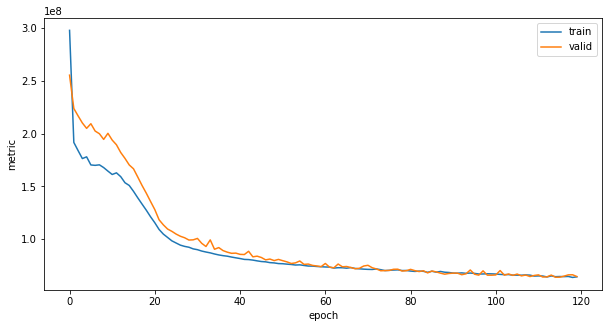

In [39]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(history.history['mse'], label = "train")
ax.plot(history.history['val_mse'], label ="valid")
ax.set_xlabel("epoch")
ax.set_ylabel("metric")
ax.legend()
plt.show()

In [40]:
y_predict = model.predict([x_test["FuelType"].values, x_test["gearboxType"].values, 
                     x_test["Brand"].values, x_test[num_features].values])#, y_test, verbose=2)

619/619 [==============================] - 1s 728us/step


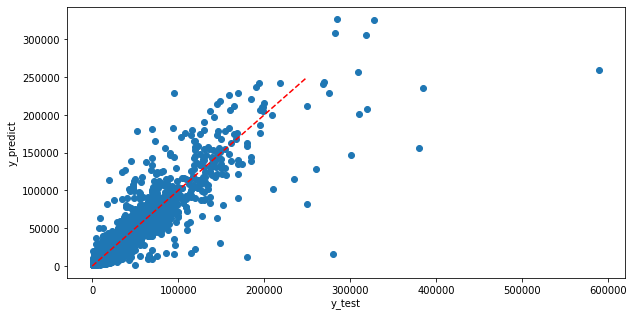

In [41]:
fig , ax = plt.subplots(1,1, figsize = (10,5))

ax.scatter(y_test.values, y_predict.reshape(-1))
ax.plot([0,250000], [0,250000], "--", c="red")
ax.set_xlabel("y_test")
ax.set_ylabel("y_predict")
plt.show()

In [ ]:
#y_predict.reshape(-1)

In [42]:
label_encoder_dict["Brand"].inverse_transform([i for i in np.arange(0,29,1)])

array(['ALFA ROMEO', 'AUDI', 'BMW', 'CHEVROLET', 'CITROEN', 'DACIA',
       'FIAT', 'FORD', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LANCIA',
       'LAND ROVER', 'MERCEDES BENZ', 'MINI', 'NISSAN', 'OPEL', 'Other',
       'PEUGEOT', 'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SMART',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [43]:
from tensorflow.keras import backend as K

In [44]:
outputs = [layer.output for layer in model.layers]          # all layer outputs
#functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

In [45]:
functors = K.function([inputss[2]], [outputs[8]])

In [47]:
embds = [functors(i)[0] for i in range(0,29,1)]

In [48]:
embds_reshape = [vec.reshape(1,-1)[0] for vec in embds]

In [49]:
res = np.vstack(embds_reshape)

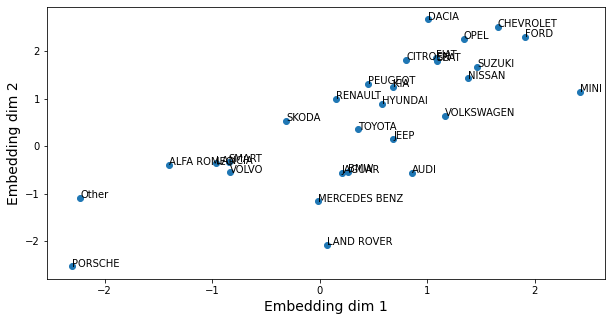

In [50]:
fig , ax = plt.subplots(1,1, figsize=(10,5))
ax.scatter(res[:,0], res[:,1])
ax.set_xlabel("Embedding dim 1", fontsize=14)
ax.set_ylabel("Embedding dim 2", fontsize=14)

text_brand = list(le.inverse_transform([i for i in np.arange(0,29,1)]))

for i, text in enumerate(text_brand):
    ax.annotate(text, (res[i,0], res[i,1]))

plt.show()



In [ ]:
#len(text_brand)